# Testing

In [3]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams['figure.dpi'] = 80


In [4]:
from ift6758.data.Feature_Engineering1 import combineAllFeatures, goalRatioPerDistance, goalRatioPerAngle

In [9]:
df_2020_2021 = pd.read_csv('./2020finalDataset.csv')
train_set = combineAllFeatures(df_2020_2021)
train_set.to_csv('Feature engerring 1.csv')
train_set.columns

Index(['gameID', 'eventType', 'period', 'periodTime', 'periodType',
       'teamOfShooter', 'homeOrAway', 'xCoord', 'yCoord', 'shooter', 'goalie',
       'shotType', 'emptyNet', 'strength', 'season', 'rinkSide', 'Is_goal',
       'empty_Net', 'Y_net', 'X_net', 'Distance_from_net', 'Angle_from_net'],
      dtype='object')

In [16]:
#distance
lr_model_d =joblib.load(open('models/baseline_distance_logistic_reg.joblib', 'rb'))
df=pd.read_csv("Feature engerring 1.csv")
X_test_d=df["Distance_from_net"]
y_test=df["Is_goal"]
X_test_d = np.array(X_test_d).reshape(-1, 1)
print(lr_model_d.predict_proba(X_test_d))
lr_model_d.score(X_test_d, y_test)
y_score_d = lr_model_d.predict_proba(X_test_d)[:,1]

[[0.90739869 0.09260131]
 [0.93155043 0.06844957]
 [0.93312044 0.06687956]
 ...
 [0.93009923 0.06990077]
 [0.86098561 0.13901439]
 [0.8842256  0.1157744 ]]


In [11]:
#angle
lr_model_a =joblib.load(open('models/baseline_angle_logistic_reg.joblib', 'rb'))
df=pd.read_csv("Feature engerring 1.csv")
X_test_a=df["Angle_from_net"]
y_test=df["Is_goal"]
X_test_a = np.array(X_test_a).reshape(-1, 1)
print(lr_model_a.predict_proba(X_test_a))
lr_model_a.score(X_test_a, y_test)
y_score_a = lr_model_a.predict_proba(X_test_a)[:,1]

[[0.93578901 0.06421099]
 [0.9108692  0.0891308 ]
 [0.91806897 0.08193103]
 ...
 [0.89641719 0.10358281]
 [0.8924658  0.1075342 ]
 [0.93123295 0.06876705]]


In [12]:
#distance and angle
lr_model_d_a =joblib.load(open('models/baseline_distance_angle_logistic_reg.joblib', 'rb'))
df=pd.read_csv("Feature engerring 1.csv")
X_test_d_a=df[["Distance_from_net","Angle_from_net"]]
y_test=df["Is_goal"]
# X_test = np.array(X_test)
print(lr_model_d_a.predict_proba(X_test_d_a))
lr_model_d_a.score(X_test_d_a, y_test)
y_score_d_a = lr_model_d_a.predict_proba(X_test_d_a)[:,1]

[[0.95640058 0.04359942]
 [0.92904019 0.07095981]
 [0.9419203  0.0580797 ]
 ...
 [0.90041993 0.09958007]
 [0.82582745 0.17417255]
 [0.93994395 0.06005605]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


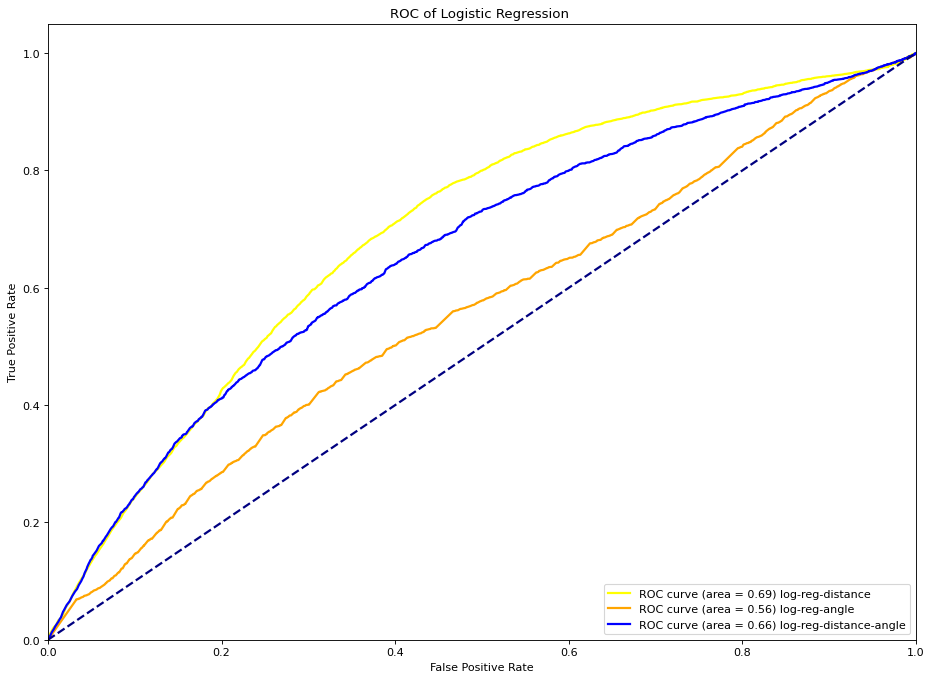

In [17]:
from sklearn.metrics import roc_curve, auc

a_d, b_d, _d = roc_curve(y_test, y_score_d)
a_a, b_a, _d = roc_curve(y_test, y_score_a)
a_d_a, b_d_a, _da = roc_curve(y_test, y_score_d_a)


roc_auc_d = auc(a_d, b_d)
roc_auc_a = auc(a_a, b_a)
roc_auc_d_a = auc(a_d_a, b_d_a)


plt.figure()
plt.plot(
    a_d,
    b_d,
    color="yellow",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance" % roc_auc_d,
)
plt.plot(
    a_a,
    b_a,
    color="orange",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-angle" % roc_auc_a,
)
plt.plot(
    a_d_a,
    b_d_a,
    color="blue",
    lw=2,
    label="ROC curve (area = %0.2f) log-reg-distance-angle" % roc_auc_d_a,
)
xy=[0, 1]
plt.plot(xy, xy, color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC of Logistic Regression ")
plt.legend(loc="lower right")

plt.savefig('./figures/testing_ROC.png')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


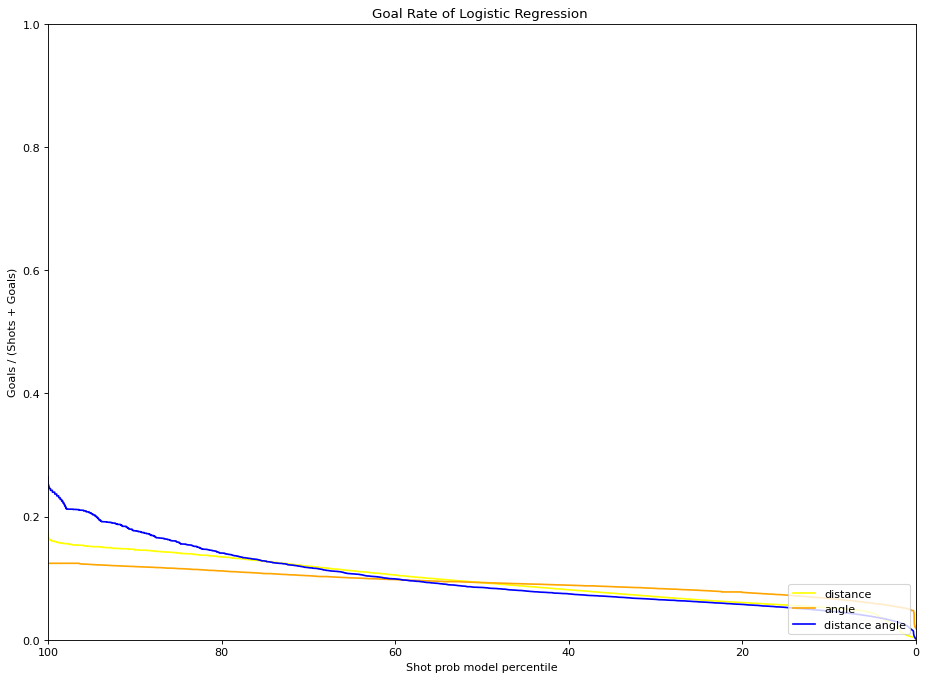

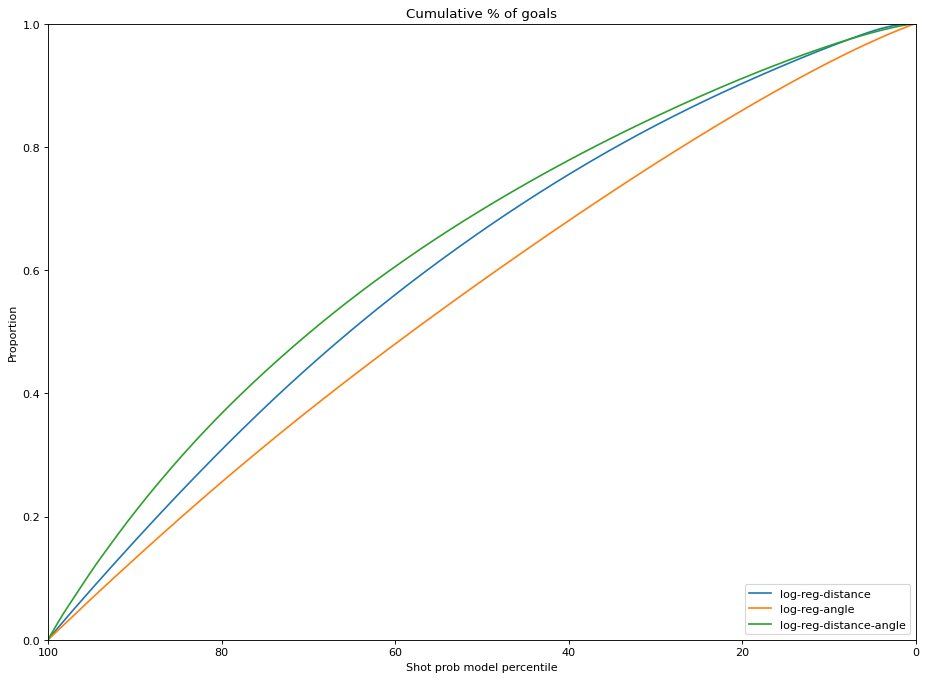

In [14]:
#model percentile
iu_d = lr_model_d.predict_proba(X_test_d)[:,1]
n_d = len(iu_d)
x_axis_d = np.arange(n_d)[::-1]*(100/n_d)

iu_a = lr_model_a.predict_proba(X_test_a)[:,1]
n_a = len(iu_a)
x_axis_a = np.arange(n_a)[::-1]*(100/n_a)

iu_d_a = lr_model_d_a.predict_proba(X_test_d_a)[:,1]
n_d_a = len(iu_d_a)
x_axis_d_a = np.arange(n_d_a)[::-1]*(100/n_d_a)

#print(x_axis)

iu_y_d = iu_d[::-1]
iu_y_d[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum_d = np.cumsum(iu_y_d)

iu_y_a = iu_a[::-1]
iu_y_a[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum_a = np.cumsum(iu_y_a)

iu_y_d_a = iu_d_a[::-1]
iu_y_d_a[::-1].sort()
# print(sum(lr_probs_y))
#print(lr_probs_y)
iu_y_sum_d_a = np.cumsum(iu_y_d_a)


plt.figure()
plt.plot(
    x_axis_d,
    iu_y_d,
    color="yellow",
    label = 'distance'
)
plt.plot(
    x_axis_a,
    iu_y_a,
    color="orange",
    label = 'angle'
)
plt.plot(
    x_axis_d_a,
    iu_y_d_a,
    color="blue",
    label = 'distance angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Goals / (Shots + Goals)")
plt.title("Goal Rate of Logistic Regression ")
plt.legend(loc="lower right")
plt.savefig('./figures/test_logR_GR.png')
plt.show()

#cumulative plot
plt.figure()
plt.plot(
    x_axis_d,
    iu_y_sum_d/sum(iu_y_d),
    label = 'log-reg-distance'
)
plt.plot(
    x_axis_a,
    iu_y_sum_a/sum(iu_y_a),
    label = 'log-reg-angle'
)
plt.plot(
    x_axis_d_a,
    iu_y_sum_d_a/sum(iu_y_d_a),
    label = 'log-reg-distance-angle'
)
plt.xlim([100, 0])
plt.ylim([0.0, 1.0])
plt.xlabel("Shot prob model percentile")
plt.ylabel("Proportion")
plt.title("Cumulative % of goals")
plt.legend(loc="lower right")
plt.savefig('./figures/test_logR_CP.png')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


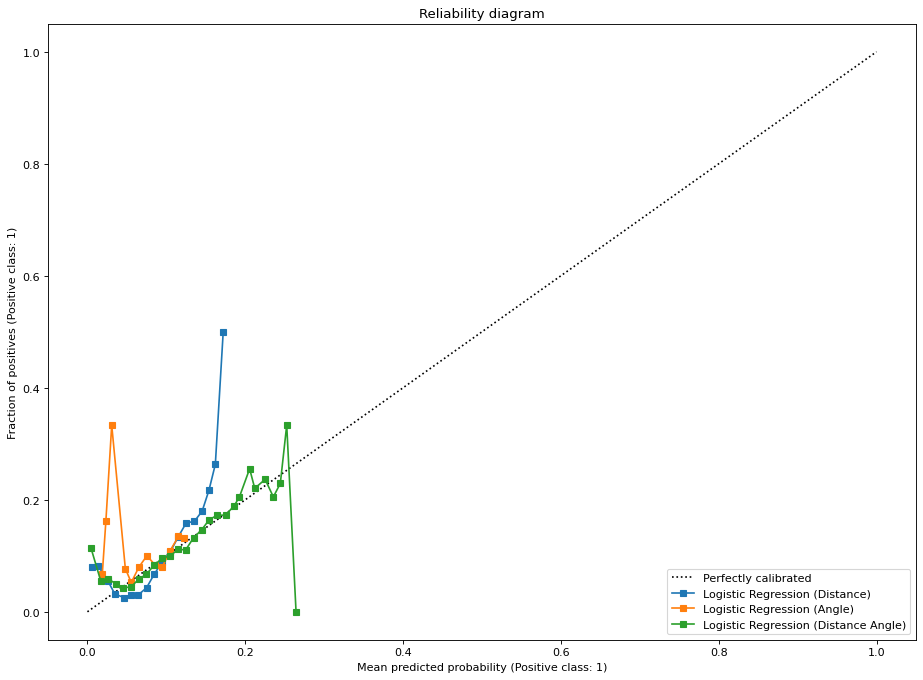

In [15]:
from sklearn.calibration import CalibrationDisplay

ax = plt.axes()
disp_d = CalibrationDisplay.from_estimator(lr_model_d, X_test_d, y_test, name='Logistic Regression (Distance)',ax=ax, n_bins = 100)
disp_a = CalibrationDisplay.from_estimator(lr_model_a, X_test_a, y_test, name='Logistic Regression (Angle)',ax=ax, n_bins = 100)
disp_d_a = CalibrationDisplay.from_estimator(lr_model_d_a, X_test_d_a, y_test, name='Logistic Regression (Distance Angle)',ax=ax, n_bins = 100)



plt.title("Reliability diagram")
plt.savefig('./figures/test_Reliability_Diagram.png')
plt.show()